Realizar una limpieza de los datos y análisis exploratorio de datos para determinar las características de las películas que tienen mayor probabilidad a ser mejor puntuadas.

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Escuela/Mineria/NetflixOriginals.csv"
data = pd.read_csv(ruta,encoding ="latin1")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Imprimimos los datos que tenemos

In [ ]:
print(data.shape)
data.head()

(584, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,08-05-19,58,2.5,English/Japanese
1,Dark Forces,thriller,"August 21, 2020",81,2.6,ESP
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


Imprimimos la variables qeu se tienen

In [ ]:
# Veamos las variables categóricas y las numéricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       580 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    583 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Realizaremos el proceso de limpieza teniendo en cuenta lo siguiente:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes
3. Registros repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas.
5. Errores tipográficos en el caso de las variables categóricas


Imprecion de las caracteristicas y valores de las variables

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


**Eliminacion de columnas irrelevantes**

Verrificasion  y conteo de los niveles en las diferentes columnas categóricas

In [ ]:
cols_cat = ['Title', 'Genre', 'Premiere', 'Language']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna Title: 579 subniveles
Columna Genre: 130 subniveles
Columna Premiere: 397 subniveles
Columna Language: 46 subniveles


Verificasion de lo que ocurre con las columnas numéricas:

In [ ]:
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


Contabilizacion de las lineas con filas repetidas

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (579, 6)
Tamaño del set después de eliminar las filas repetidas: (579, 6)


Graficasion de las variables nuemricas

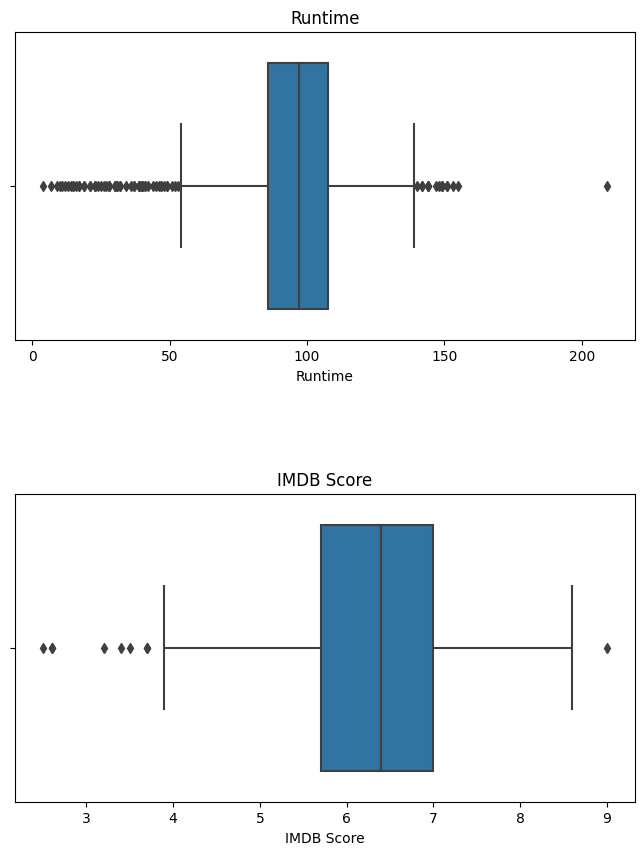

In [ ]:
#4.4 *Outliers* en las variables numéricas

# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

Creacion de filtros para tener informacion mas precisa

In [ ]:
# Eliminar filas con "IMDB Score"<7
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data[data['IMDB Score']>=7]
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (579, 6)
Tamaño del set después de eliminar registros de edad: (150, 6)


In [ ]:
# Eliminar filas con "Runtime"<60
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data[data['Runtime']>60]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (150, 6)
Tamaño del set después de eliminar registros de duración: (121, 6)


**Errores tipográficos en variables categóricas**

Graficacion de los subniveles de cada variable categórica

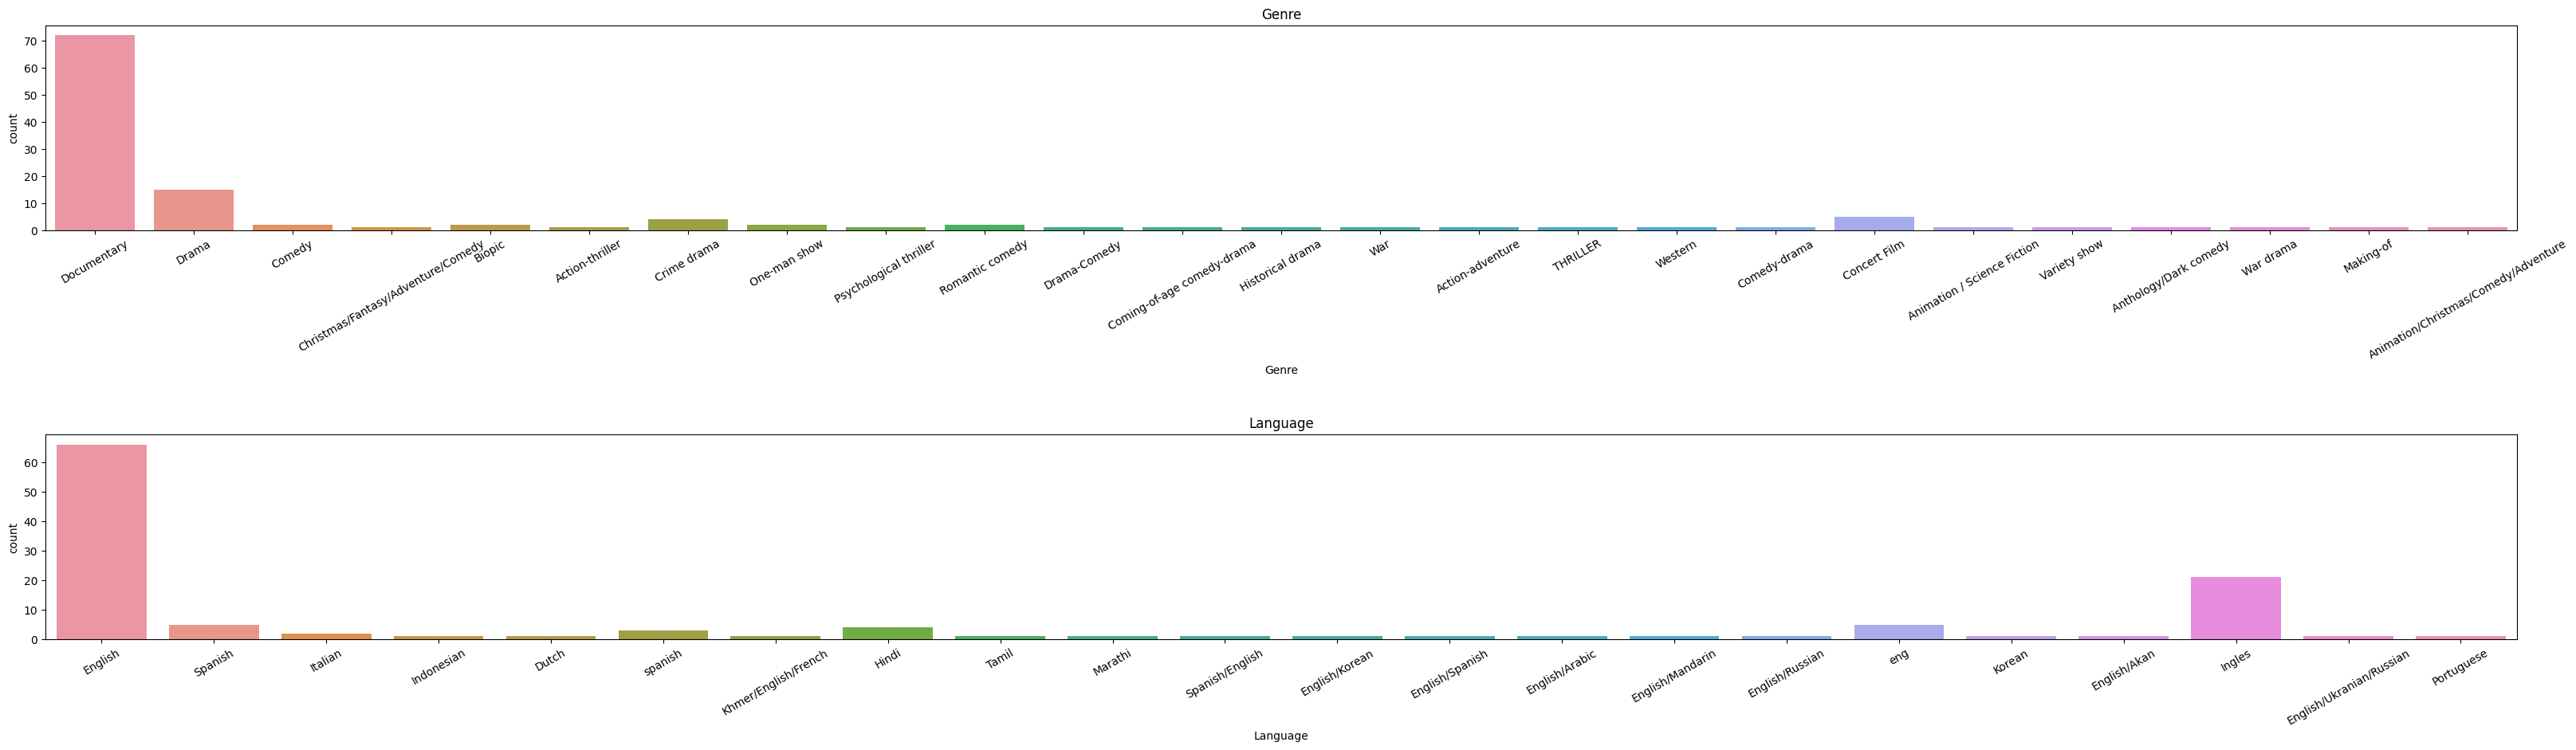

In [ ]:
cols_cat = ['Genre', 'Language']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(40,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Eliminacion de errores en los nombres de cada categoria y que llevan a repetir los datos pero con diferencias en los nombres

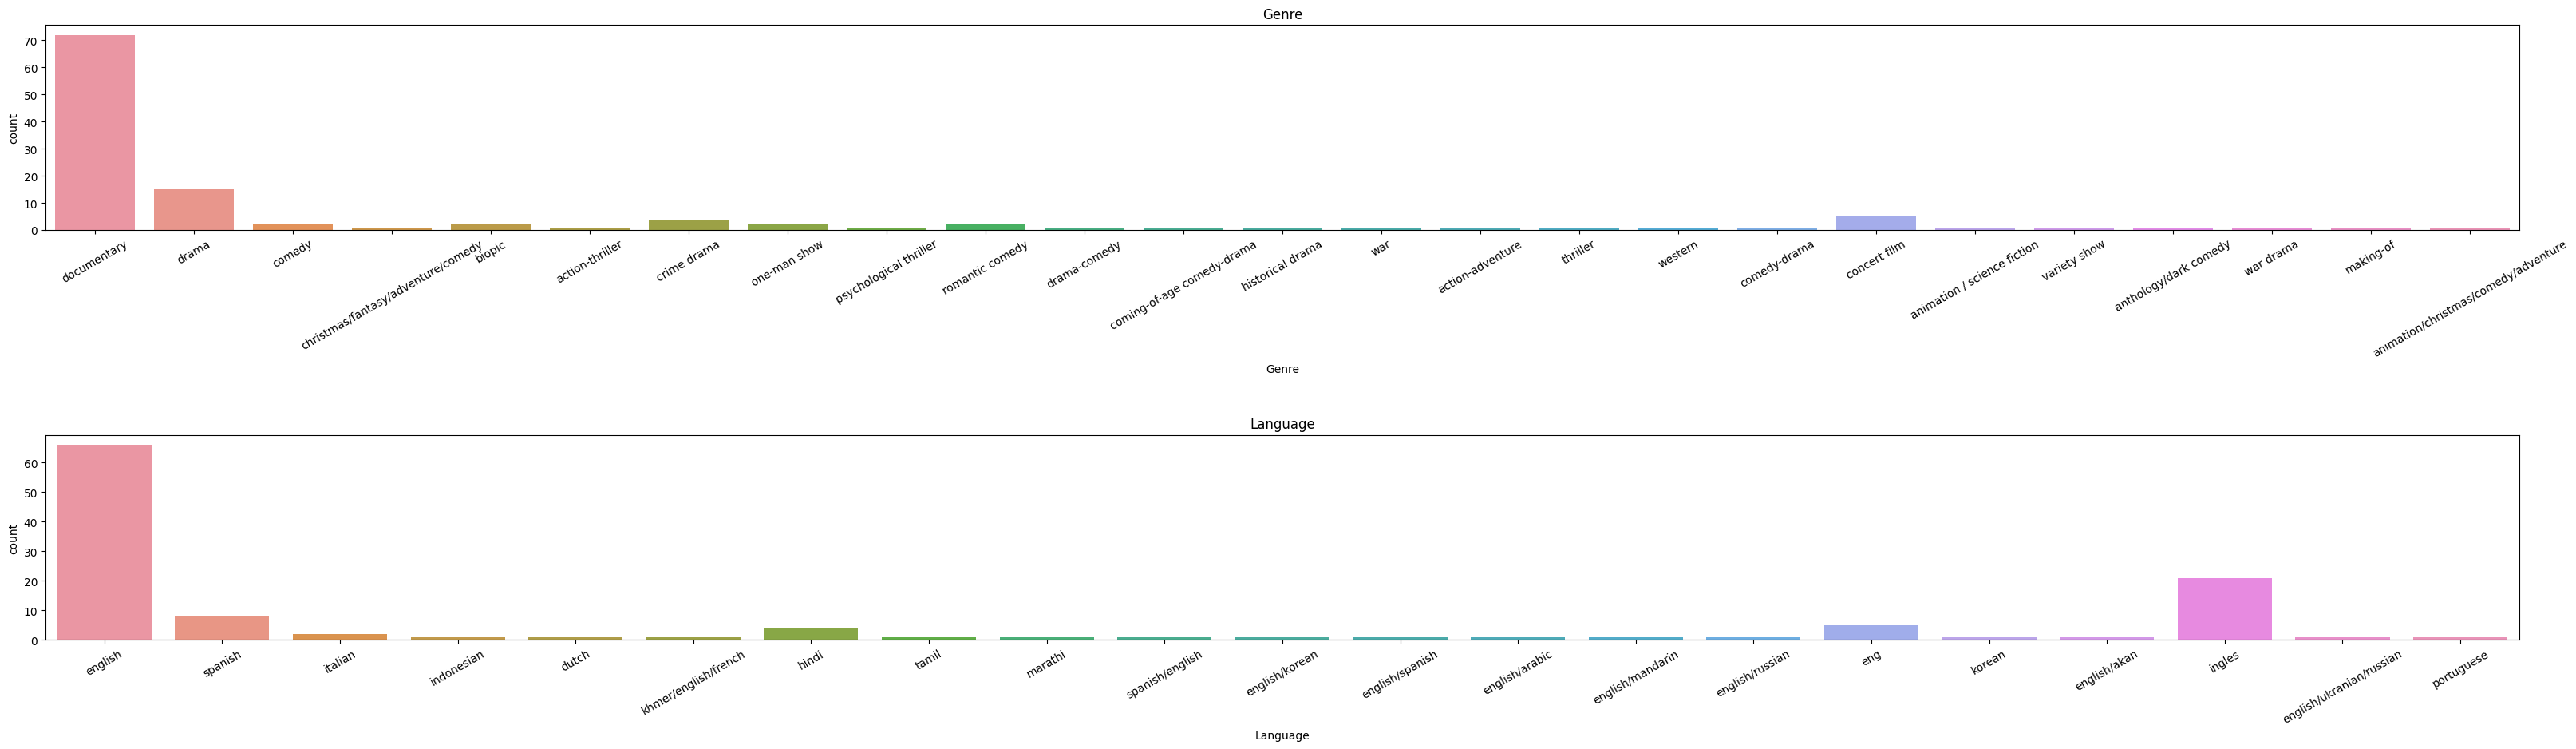

In [ ]:
for column in data.columns:
    #Integracion de cariabels independientemente de si su nombre esta en mayusculas o minusculas
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Generacion de las gráficas
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(40,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Unificasion de la ctaegoria Language en todas sus variables.

In [ ]:
print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('eng', 'ingles', regex=False)
print(data['Language'].unique())

['english' 'spanish' 'italian' 'indonesian' 'dutch' 'khmer/english/french'
 'hindi' 'tamil' 'marathi' 'spanish/english' 'english/korean'
 'english/spanish' 'english/arabic' 'english/mandarin' 'english/russian'
 'eng' 'korean' 'english/akan' 'ingles' 'english/ukranian/russian'
 'portuguese']
['ingleslish' 'spanish' 'italian' 'indonesian' 'dutch'
 'khmer/ingleslish/french' 'hindi' 'tamil' 'marathi' 'spanish/ingleslish'
 'ingleslish/korean' 'ingleslish/spanish' 'ingleslish/arabic'
 'ingleslish/mandarin' 'ingleslish/russian' 'ingles' 'korean'
 'ingleslish/akan' 'ingleslish/ukranian/russian' 'portuguese']


Unificasion de la ctaegoria genre en todas sus variables.

In [ ]:
print(data['Genre'].unique())
data['Genre'] = data['Genre'].str.replace('war','war drama', regex=False)
print(data['Genre'].unique())

['documentary' 'drama' 'comedy' 'christmas/fantasy/adventure/comedy'
 'biopic' 'action-thriller' 'crime drama' 'one-man show'
 'psychological thriller' 'romantic comedy' 'drama-comedy'
 'coming-of-age comedy-drama' 'historical drama' 'war' 'action-adventure'
 'thriller' 'western' 'comedy-drama' 'concert film'
 'animation / science fiction' 'variety show' 'anthology/dark comedy'
 'war drama' 'making-of' 'animation/christmas/comedy/adventure']
['documentary' 'drama' 'comedy' 'christmas/fantasy/adventure/comedy'
 'biopic' 'action-thriller' 'crime drama' 'one-man show'
 'psychological thriller' 'romantic comedy' 'drama-comedy'
 'coming-of-age comedy-drama' 'historical drama' 'war drama'
 'action-adventure' 'thriller' 'western' 'comedy-drama' 'concert film'
 'animation / science fiction' 'variety show' 'anthology/dark comedy'
 'war drama drama' 'making-of' 'animation/christmas/comedy/adventure']


Contabilizacion final de los datos

In [ ]:
data.shape

(121, 6)

Guardado del nuevo archivo con los datos limipos

In [ ]:
ruta = "/gdrive/MyDrive/Escuela/Mineria/NetflixOriginals_clean.csv"
data.to_csv(ruta, index=False)

#Concluion
Despues de realizar la limpieza de los datos cai en la conclusion de que la relacion del porque una pelicula tienen mayor tendencia a ser de mayor puntuacion en funcion a cual es su genero, debido a que se puede notar que las peliculas del genero de comedia tienden a tener mejores numeros.